## Neurona

#### Liberias a utilizar

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import xlogy
from math import log

from generator_data import gen_data_2d

---

### Data

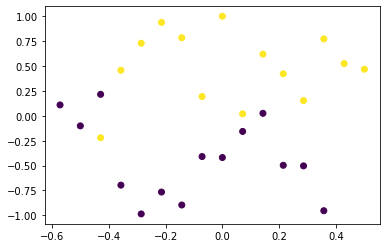

In [2]:
d = gen_data_2d(8,0.80)

-------

## Neurona

###

In [ ]:
def sigmoide(z, d = False):
    """
    Retorna el valor de la funcion sigmoide

        Parameters:
                z (float): Argumento
                d (bool): Derivada

        Returns:
                valor (float): Valor de la sigmoide
    """
    if d:
        return z * (1-z)

    return (1 / (1 + np.exp(-z)))


def nll_loss(a,Y, dz = False):
    """
    Retorna el costo segun la funcion negative log-likelihood (nll) 
    para el valor predecido a con respecto al real Y

        Parameters:
                a (int): Valor predecido
                Y (int): Valor real
                dz (bool): Derivada

        Returns:
                l (float): Costo
    """
    if dz:
        return (a-Y)

    if Y:
        l = -log(a)
    else:
        l = -log(1-a)

    return l


class Neuron:
    '''Clase Neurona para m entradas y una salida'''
    def __init__(self, m):
        self.m = m
        self.W = [0 for i in range(m)]
        self.b = 0
        self.loss = 0

        self._p = None
        self._hist_loss = []
        self._hist_W = []
        self._hist_b = []


    def init_param(self):
        '''Inicializa los pesos W con valores aleatorios del entre 0 y 1'''
        for i in range(self.m):
            self.W[i] = random.random()

        self.b = random.random()

        return True


    def preactivar(self, X):
        '''Realiza el producto punto de los pesos por las entradas'''

        z = 0

        for wi, xi in zip(self.W, X):
            z += wi*xi

        z += self.b

        return z


    def predecir(self, X, func_act, *args):
        '''
        Evalua la preactivacion en la funcion activacion

        Parameters:
                X (list or tupla): entrada
                func_act (fun): funcion activacion
                *arg: parametros adicionales de la funcion activacion

        Return:
                predicion (float): prediccion
        '''
        self._p = func_act(self.preactivar(X))

        return self._p 


    def entrenar(self, iter, eta, ce, func_act , func_loss, *args):
        '''
        Entrena en modelo con el conjunto de dato de entrada

        Parameters:
                iter (int): numer de iteraciones
                eta (float): taza de aprendizaje
                ce (list of tupla): conjunto de datos
                func_act (fun): funcion activacion
                func_loss (fun): funcion de perdida
                *arg: parametros adicionales de la funcion activacion y perdida

        Return:
                result (dict): resumen de entrenamiento
        '''
        #cantidad de data point
        n = len(ce)

        #inicializando las derivadas parciales
        dw = [0 for i in range(self.m)] 
        db = 0

        #iterando
        for k in range(iter):
            for X, Y in ce:

                a = self.predecir(X, func_act)

                dz = func_loss(a, Y, dz=True)

                for i, xi in enumerate(X):
                    dw[i] += xi * dz

                db  += dz

            #media de coste
            dw = [(dwi / n ) for dwi in dw]
            db /= n

            #actualizando pesos
            for i, dwi in enumerate(dw):
                self.W[i] -= eta*dwi

            self.b -= eta*db

            #calculando coste
            self._loss = func_loss(a, Y)
            
            #historico de entrenamiento
            self._hist_loss.append(self._loss)
            self._hist_W.append(self.W)
            self._hist_b.append(self.b)

        result ={
            'loss': self._loss,
            'W': self.W,
            'b': self.b,
            'it':iters,
            'dp':n,
        }

        return result


    def visualizar_entrenamiento(self, d, hiperplano=False):
        '''
        Visualizacion del entrenamiento contra los datos
        
        Parameters:
                d (numpy matrix): matriz de datos
                hiperplano (bool): mostrar dos planos o degradado
        
        Return:
                result (bool): True si fue ejecutado el metodo
        '''
        x = np.linspace(-0.9,0.9, 1000)
        y = np.linspace(-0.9,0.9, 1000)

        x = x.tolist()
        y = y.tolist()

        xy = []

        for xi in x:

            yi = 0
            zi = []

            for yi in y:

                z = self.predecir([xi,yi], sigmoide)

                if hiperplano:
                    z = self.predecir([xi,yi], sigmoide) > 0.5
                    p = 1 if z else 0.25

                p = z

                zi.append(p)

            xy.append(zi)
        
        zss = np.array(xy)
        
        h = plt.contourf(x, y, zss.T)
        
        plt.axis('scaled')
        plt.colorbar()
        
        plt.scatter(d[0],d[1], c = d[2])

        plt.show()

        return True


### Parametros

In [ ]:
features = d[0:2,:].T

labels = d[2,:]

eta = 0.8

iters = 1000

m = 2

ce = [f for f in zip(features.tolist(), labels)]

### Entrenamiento

In [ ]:
#Creando el objeto
neurona = Neuron(m)

#Inicializando el modelo
neurona.init_param()

#entrenando con los parametros
neurona.entrenar(iters, eta, ce, sigmoide, nll_loss)

### Visualizando las perdidas

In [ ]:
plt.plot(neurona._hist_loss)

### Visualizando los resultados

In [ ]:
print(neurona.W)
print(neurona.b)

neurona.visualizar_entrenamiento(d = d, hiperplano=False)

### Prediccion

In [ ]:
neurona.predecir(X=[0.5,0.5], func_act=sigmoide)

---

## NeuronaV

In [90]:
def sigmoide(z, d = False):
    """
    Retorna el valor de la funcion sigmoide

        Parameters:
                z (float): Argumento
                d (bool): Derivada

        Returns:
                valor (float): Valor de la sigmoide
    """
    if d:
        return z * (1-z)

    return (1 / (1 + np.exp(-z)))


def nll_lossv(a,Y, dz = False, sum = True):
    """
    Retorna el costo segun la funcion negative log-likelihood (nll) 
    para el valor predecido a con respecto al real Y

        Parameters:
                a (int): Valor predecido
                Y (int): Valor real
                dz (bool): Derivada

        Returns:
                l (float): Costo
    """
    if dz:
        v = (a-Y)
        return v

    loss = -xlogy(Y, a) - xlogy((1-Y),(1-a))

    if sum:
        loss = loss.sum() / loss.shape[1]

    return loss


class NeuronV:
    '''Clase Neurona para m entradas y una salida'''
    def __init__(self, m):
        self._wm = (m,1)
        self.m = m
        self.W = np.zeros((m,1))
        self.b = 0
        self.loss = 0

        self._hist_loss = []
        self._hist_W = []
        self._hist_b = []


    def init_param(self):
        '''Inicializa los pesos W con valores aleatorios del entre 0 y 1'''

        self.W = np.random.random(self._wm )
        self.b = random.random()

        return True


    def get_preactivate(self, X):
        '''Realiza el producto punto de los pesos por las entradas'''
        return np.dot(self.W.T, X) + self.b


    def get_predict(self, X, func_act, *args):
        '''
        Evalua la preactivacion en la funcion activacion

        Parameters:
                X (list or tupla): entrada
                func_act (fun): funcion activacion
                *arg: parametros adicionales de la funcion activacion

        Return:
                predicion (float): prediccion
        '''
        return func_act(self.get_preactivate(X))


    def  update_param(self, dw, db, eta):
        """
        Actualiza los pesos W con el gradiente

        Args:
            dw (numpy Array): gradiente de W
            db (float): gradiente de b
            eta (float): taza de aprendizaje

        Returns:
            booll : True
        """

        self.W = self.W - eta*dw
        self.b = self.b - eta*db

        return True


    def update_hist(self):
        """Actualizar el historico de los parametros

        Args:
            loss (float): _description_
            W (float): _description_
            b (float): _description_

        Returns:
            bool: True
        """
        self._hist_loss.append(self._loss)
        self._hist_W.append(self.W)
        self._hist_b.append(self.b)
        return True


    def entrenar(self, iter, eta, X, Y, func_act , func_loss, *args):
        '''
        Entrena en modelo con el conjunto de dato de entrada

        Parameters:
                iter (int): numer de iteraciones
                eta (float): taza de aprendizaje
                X (numpy array): conjunto de datos
                Y (numpy array): etiquetas
                func_act (fun): funcion activacion
                func_loss (fun): funcion de perdida
                *arg: parametros adicionales de la funcion activacion y perdida

        Return:
                result (dict): resumen de entrenamiento
        '''
        #cantidad de data point
        n = X.shape[1]

        #print('n:', n)

        #inicializando las derivadas parciales
        dw = np.zeros(self._wm); db = 0

        #iterando
        for k in range(iter):

            a = self.get_predict(X, func_act)

            dz = func_loss(a, Y, dz=True)

            dwi = X * dz

            dwi = dwi.sum(axis=1).reshape(self._wm)/n
            dbi = dz.sum()/n

            dw = dw + dwi
            db = db + dbi

            self.update_param(dw,db,eta)

            self._loss = func_loss(a, Y)

            self.update_hist()

        result ={
            'loss': self._loss,
            'W': self.W,
            'b': self.b,
            'it':iters,
            'dp':n,}

        return result


    def visualizar_entrenamiento(self, d, hiperplano=False):
        '''
        Visualizacion del entrenamiento contra los datos

        Parameters:
                d (numpy matrix): matriz de datos
                hiperplano (bool): mostrar dos planos o degradado

        Return:
                result (bool): True si fue ejecutado el metodo
        '''
        x = np.linspace(-0.9,0.9, 1000)
        y = np.linspace(-0.9,0.9, 1000)

        x = x.tolist()
        y = y.tolist()

        xy = []

        for xi in x:

            yi = 0
            zi = []

            for yi in y:

                z = self.get_predict(np.array([xi,yi]), sigmoide)[0]

                if hiperplano:
                    z = self.get_predict(np.array([xi,yi]), sigmoide)[0] > 0.5
                    p = 1 if z else 0.25

                p = z

                zi.append(p)

            xy.append(zi)

        zss = np.array(xy)

        h = plt.contourf(x, y, zss.T)

        plt.axis('scaled')
        plt.colorbar()

        plt.scatter(d[0],d[1], c = d[2])

        plt.show()

        return True

### Parametros

In [91]:
features = d[0:2,:].T

labels = np.array([d[2,:]]).T

eta = 0.25

iters = 10000

m = 2

In [92]:
features = features.T
labels = labels.T

### Entrenamiento

In [93]:
neuronav = NeuronV(2)
neuronav.init_param()

True

In [94]:
neuronav.entrenar(iter=iters, eta=eta, X=features,
                        Y=labels, func_act=sigmoide, func_loss=nll_lossv)

/tmp/ipykernel_32336/19587165.py:15: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


{'loss': 0.0,
 'W': array([[-136.86540841],
        [5006.20676437]]),
 'b': -213.92313518558097,
 'it': 10000,
 'dp': 28}

### Visualizando las perdidas

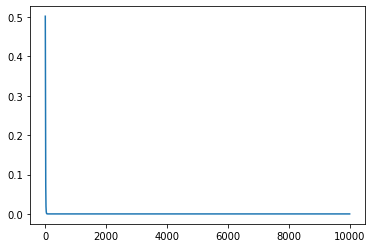

In [95]:
plt.plot(neuronav._hist_loss)

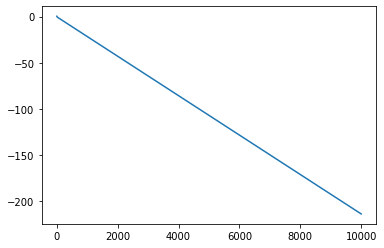

In [96]:
plt.plot(neuronav._hist_b)

### Visualizando los resultados

[[-136.86540841]
 [5006.20676437]]
-213.92313518558097
0


/tmp/ipykernel_32336/19587165.py:15: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


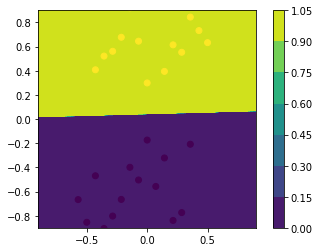

True

In [97]:
print(neuronav.W)
print(neuronav.b)
print(neuronav.loss)

neuronav.visualizar_entrenamiento(d=d)

### Prediccion

In [87]:
neuronav.get_predict(np.array([0,0]), sigmoide)

array([2.71669839e-36])